<a href="https://colab.research.google.com/github/aasr-1001/Datathon/blob/main/Datathon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


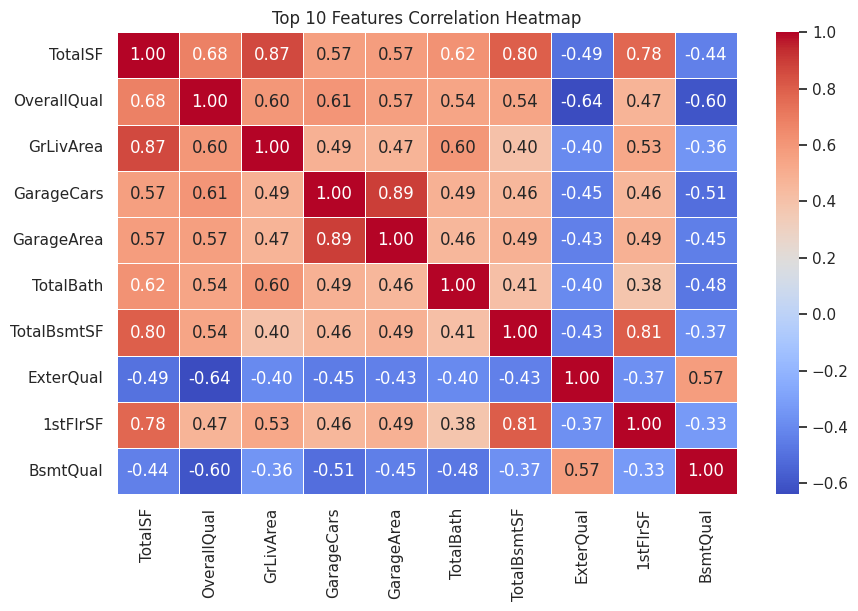

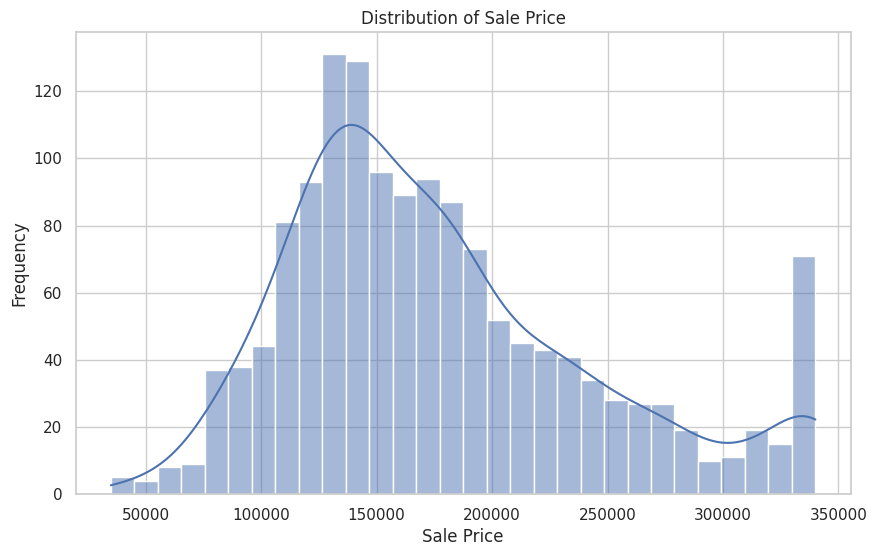

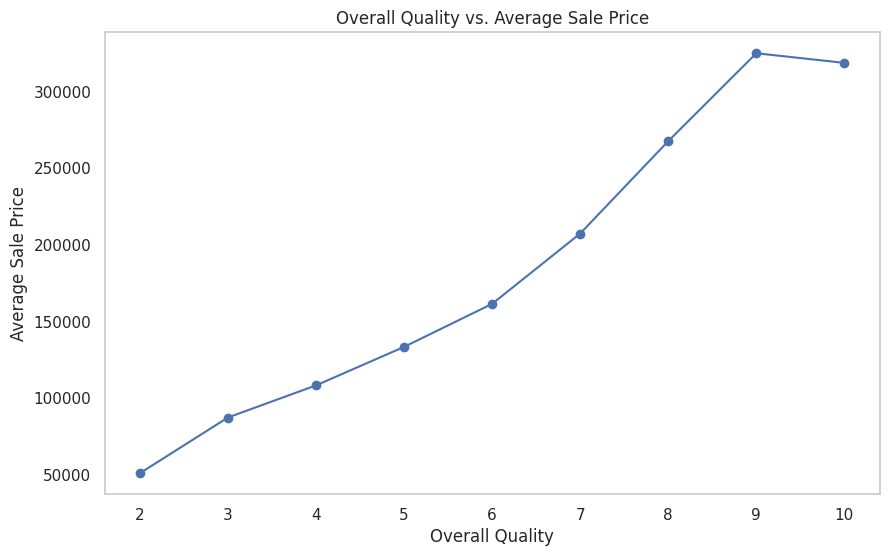

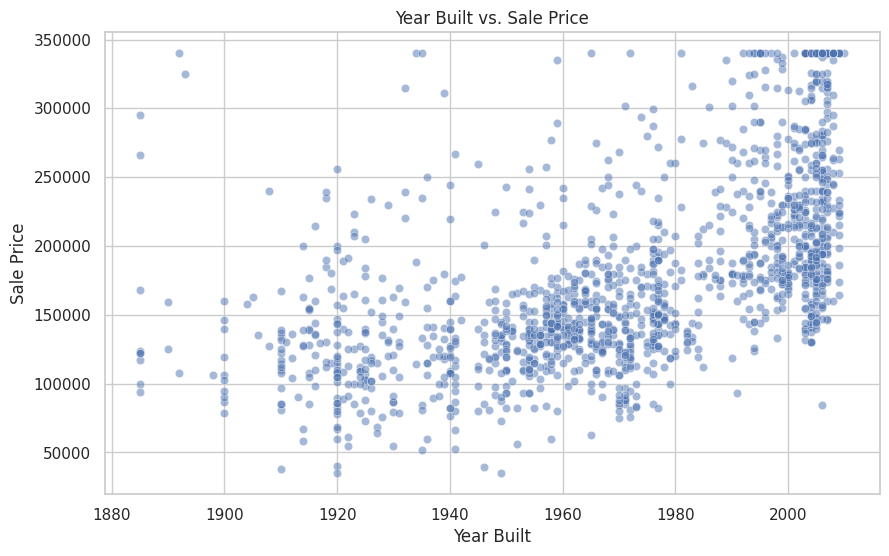

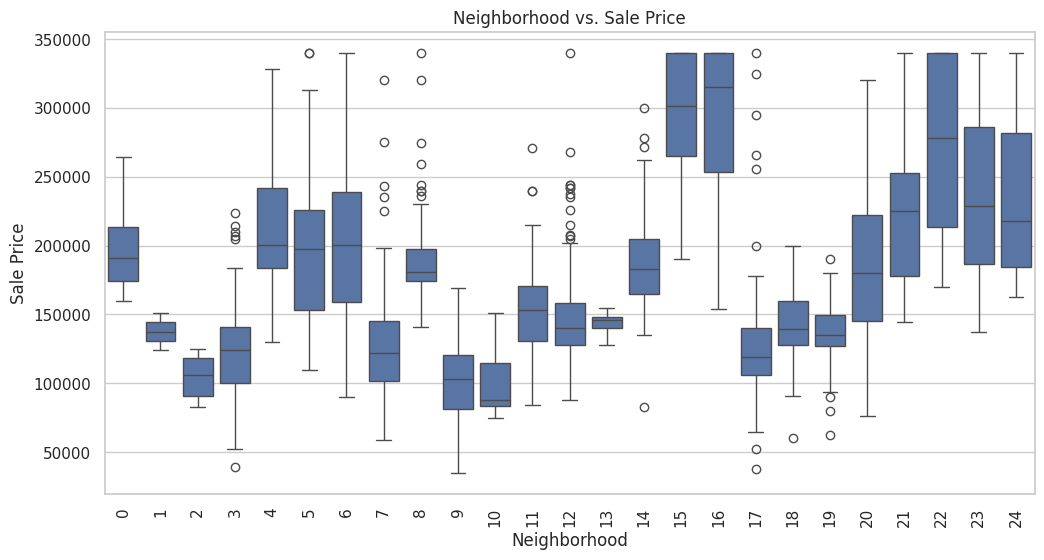

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/train_processed.csv"
df = pd.read_csv(file_path)

sns.set_style("whitegrid")

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

if 'SalePrice' in num_cols:
    corr_matrix = df[num_cols].corr()['SalePrice'].abs().sort_values(ascending=False)
    top_corr_features = corr_matrix[1:11].index

    plt.figure(figsize=(10, 6))
    sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Top 10 Features Correlation Heatmap")
    plt.show()

# Distribution of Sale Price
if 'SalePrice' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['SalePrice'], bins=30, kde=True)
    plt.title("Distribution of Sale Price")
    plt.xlabel("Sale Price")
    plt.ylabel("Frequency")
    plt.show()

if 'OverallQual' in df.columns and 'SalePrice' in df.columns:
    plt.figure(figsize=(10, 6))
    df.groupby("OverallQual")["SalePrice"].mean().plot(marker="o", linestyle="-", color="b")
    plt.title("Overall Quality vs. Average Sale Price")
    plt.xlabel("Overall Quality")
    plt.ylabel("Average Sale Price")
    plt.grid()
    plt.show()


# Year Built vs Sale Price
if 'YearBuilt' in df.columns and 'SalePrice' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'], alpha=0.5)
    plt.title("Year Built vs. Sale Price")
    plt.xlabel("Year Built")
    plt.ylabel("Sale Price")
    plt.show()


# Neighborhood vs Sale Price (if Neighborhood column exists)
if 'Neighborhood' in df.columns and 'SalePrice' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Neighborhood'], y=df['SalePrice'])
    plt.xticks(rotation=90)
    plt.title("Neighborhood vs. Sale Price")
    plt.xlabel("Neighborhood")
    plt.ylabel("Sale Price")
    plt.show()


In [10]:
import plotly.io as pio
pio.renderers.default = 'colab'


In [12]:
import plotly.express as px
import plotly.io as pio


pio.renderers.default = 'colab'


# 1. Interactive Scatter Plot: TotalSF vs SalePrice
fig = px.scatter(df, x="TotalSF", y="SalePrice", color="OverallQual", size="GarageArea",
                 hover_data=["Neighborhood", "YearBuilt"],
                 title="Interactive: TotalSF vs SalePrice")
fig.show()

# 2. Interactive Box Plot: SalePrice by Neighborhood (Top 10)
top_neigh = df.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False).head(10).index
fig = px.box(df[df["Neighborhood"].isin(top_neigh)],
             x="Neighborhood", y="SalePrice", color="Neighborhood",
             title="SalePrice Distribution by Top 10 Neighborhoods")
fig.show()

# 3. 3D Scatter: LotArea, OverallQual, SalePrice
fig = px.scatter_3d(df, x="LotArea", y="OverallQual", z="SalePrice",
                    color="OverallQual", size="TotalSF",
                    title="3D: LotArea vs Quality vs SalePrice")
fig.show()

# 4. Interactive Timeline: Median SalePrice by YearBuilt
median_price = df.groupby("YearBuilt")["SalePrice"].median().reset_index()
fig = px.line(median_price, x="YearBuilt", y="SalePrice", title="Median Sale Price by Construction Year")
fig.show()




In [18]:
import pandas as pd


file_path = "/content/drive/MyDrive/train_processed.csv"
df = pd.read_csv(file_path)

time_columns = [col for col in df.columns if 'Year' in col or 'Date' in col or 'MoSold' in col or 'YrSold' in col]

print("Time-related columns:", time_columns)


Time-related columns: ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']


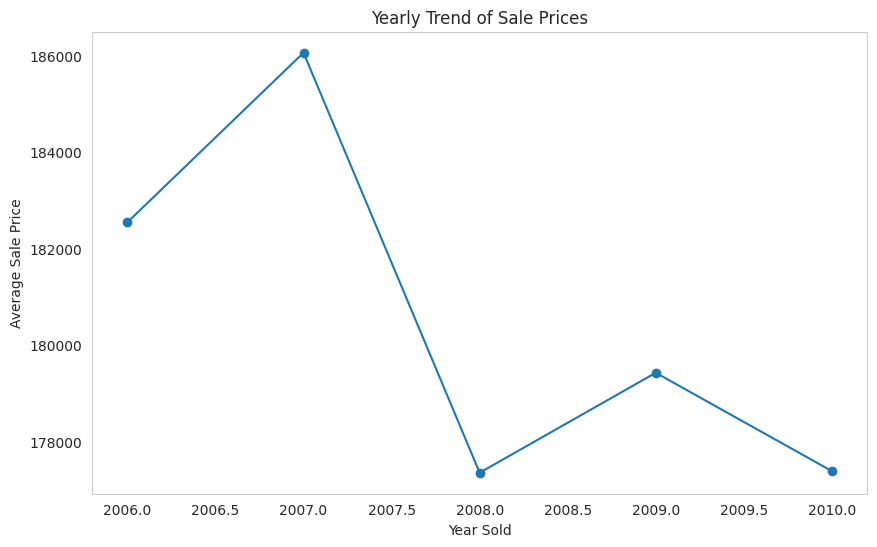

In [19]:
import matplotlib.pyplot as plt

if 'YrSold' in df.columns and 'SalePrice' in df.columns:
    df_time = df.groupby('YrSold')['SalePrice'].mean()


    plt.figure(figsize=(10, 6))
    plt.plot(df_time.index, df_time.values, marker='o', linestyle='-')
    plt.xlabel("Year Sold")
    plt.ylabel("Average Sale Price")
    plt.title("Yearly Trend of Sale Prices")
    plt.grid()
    plt.show()


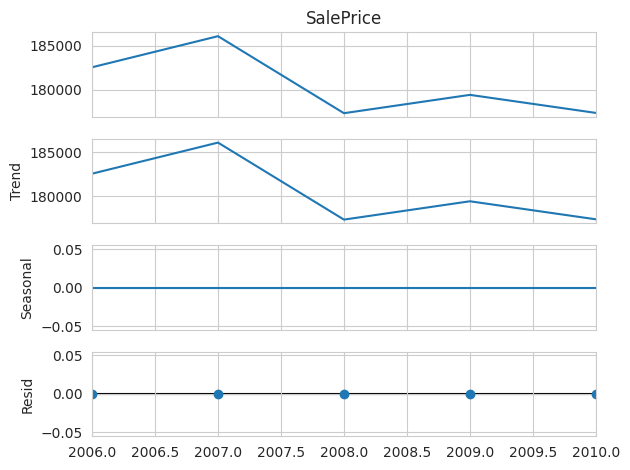

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

if 'YrSold' in df.columns and 'SalePrice' in df.columns:
    df_time = df.groupby('YrSold')['SalePrice'].mean()  # Aggregate by year

    # Decompose the time series
    decomposition = seasonal_decompose(df_time, period=1, model='additive')

    decomposition.plot()
    plt.show()


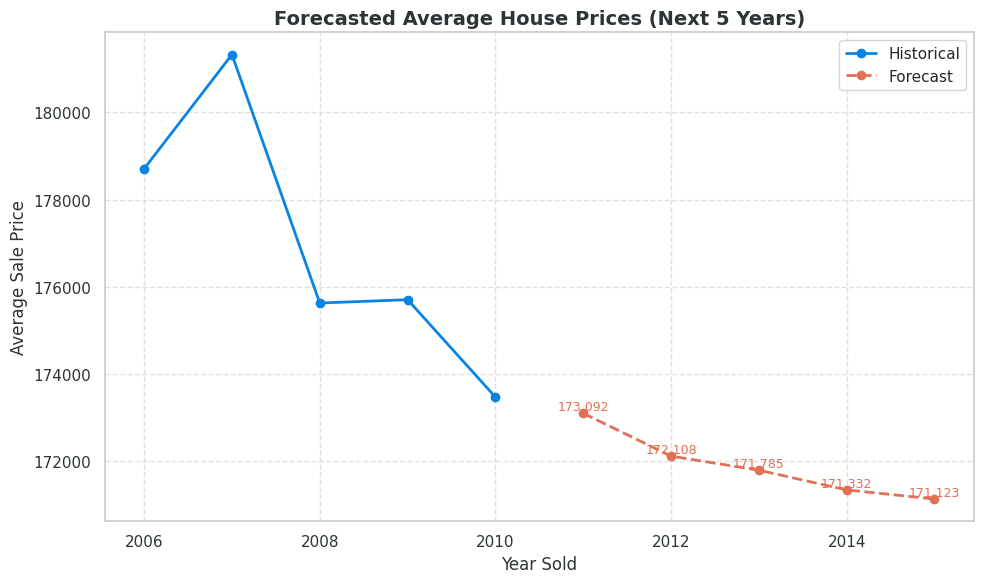

Forecasted Prices for Next 5 Years:
2011: 173,092.63
2012: 172,108.24
2013: 171,785.96
2014: 171,332.87
2015: 171,123.69


In [15]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

colors = {
    'historical': '#0984e3',  # bright blue
    'forecast': '#e17055',    # soft orange
    'text': '#2d3436'         # dark grey for text
}

if 'YrSold' in df.columns and 'SalePrice' in df.columns:
    df_time = df.groupby('YrSold')['SalePrice'].mean()

    model = ARIMA(df_time, order=(2, 1, 2))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=5)
    forecast_years = list(range(df_time.index[-1] + 1, df_time.index[-1] + 6))

    plt.figure(figsize=(10, 6))
    plt.plot(df_time.index, df_time.values, marker='o', color=colors['historical'], linewidth=2, label="Historical")
    plt.plot(forecast_years, forecast, marker='o', linestyle='--', color=colors['forecast'], linewidth=2, label="Forecast")

    for year, value in zip(forecast_years, forecast):
        plt.text(year, value, f'{int(value):,}', ha='center', va='bottom', fontsize=9, color=colors['forecast'])

    plt.xlabel("Year Sold", fontsize=12, color=colors['text'])
    plt.ylabel("Average Sale Price", fontsize=12, color=colors['text'])
    plt.title("Forecasted Average House Prices (Next 5 Years)", fontsize=14, weight='bold', color=colors['text'])
    plt.tick_params(colors=colors['text'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("Forecasted Prices for Next 5 Years:")
    for year, price in zip(forecast_years, forecast):
        print(f"{year}: {price:,.2f}")


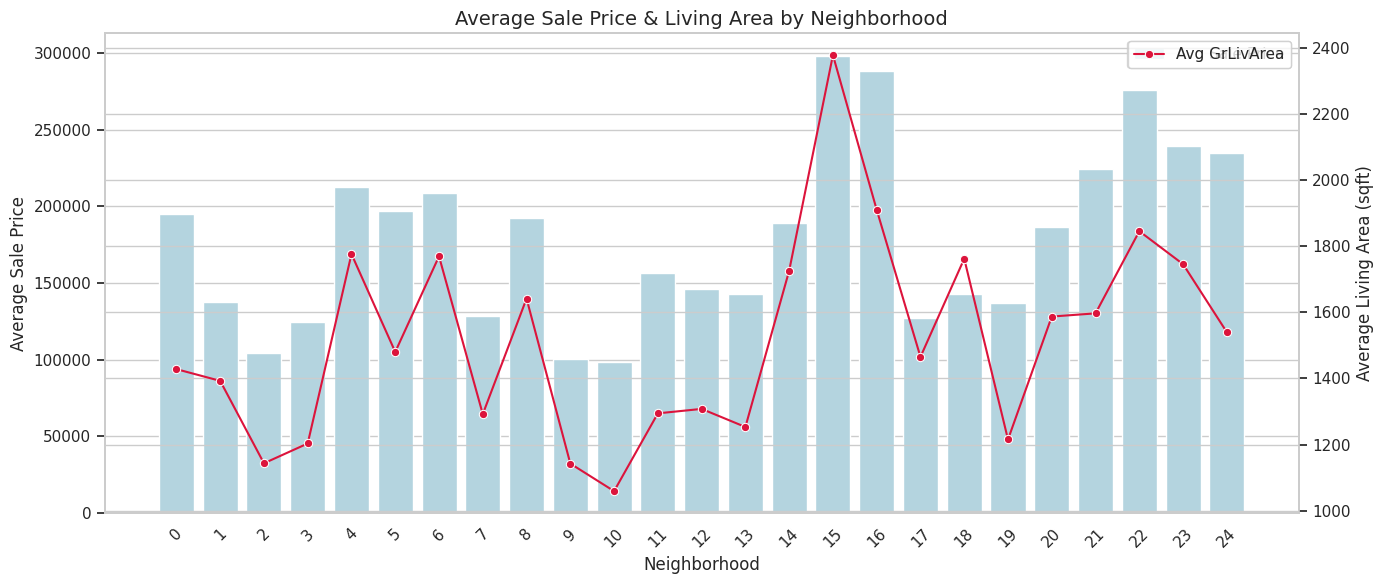

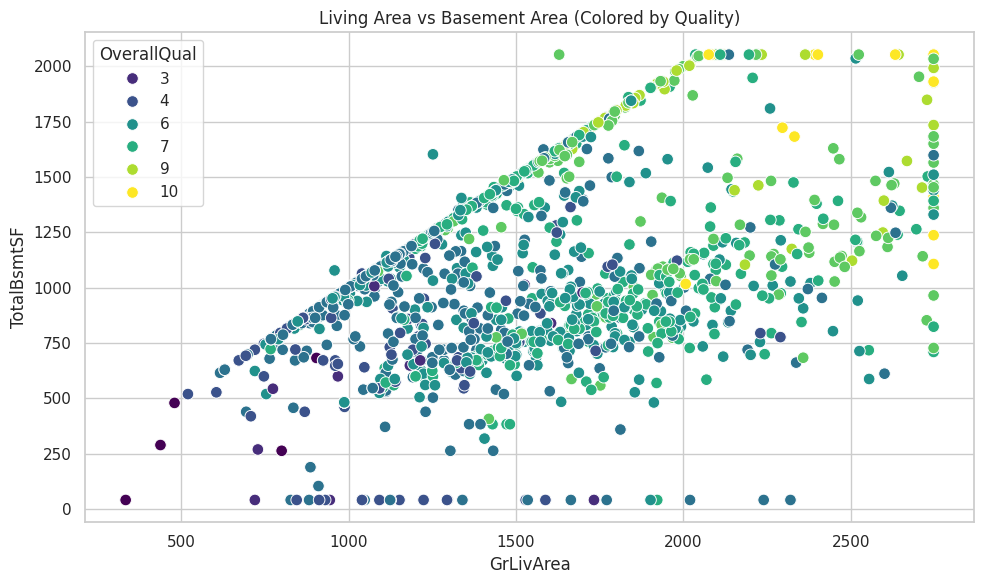

<Figure size 1000x600 with 0 Axes>

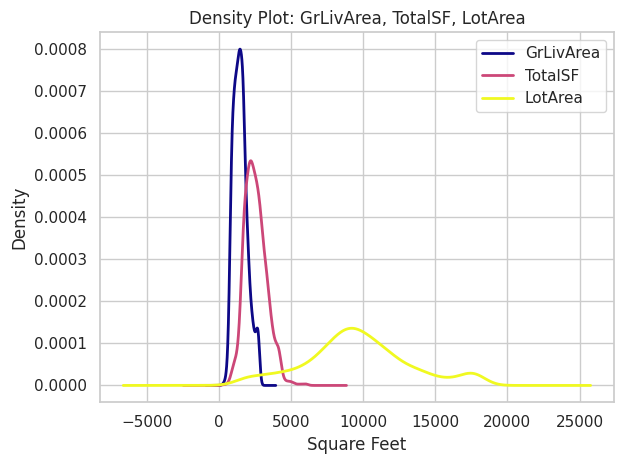

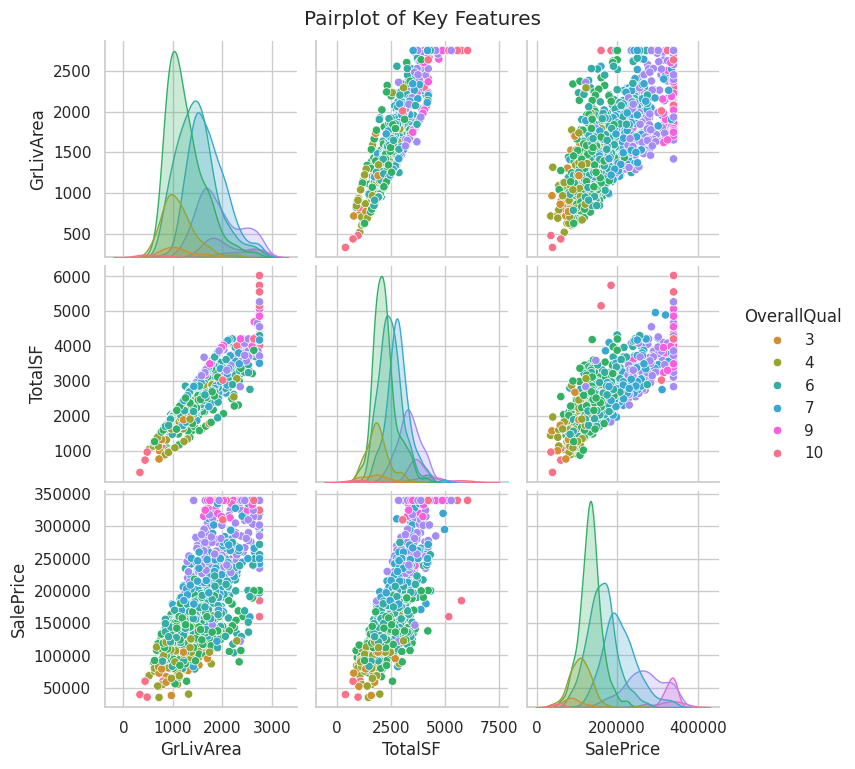

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv("/content/drive/MyDrive/train_processed.csv")
sns.set(style="whitegrid")

# 1. Bar + Line Plot: Neighborhood vs Avg SalePrice and GrLivArea

plt.figure(figsize=(14, 6))
neigh_grp = df.groupby("Neighborhood")[["SalePrice", "GrLivArea"]].mean().sort_values("SalePrice", ascending=False)

sns.barplot(x=neigh_grp.index, y=neigh_grp["SalePrice"], color='lightblue', label='Avg Sale Price')
plt.xticks(rotation=45)
plt.ylabel("Average Sale Price", fontsize=12)

# Line plot for Avg Living Area
plt.twinx()
sns.lineplot(x=neigh_grp.index, y=neigh_grp["GrLivArea"], color='crimson', marker='o', label='Avg GrLivArea')
plt.ylabel("Average Living Area (sqft)", fontsize=12)
plt.title("Average Sale Price & Living Area by Neighborhood", fontsize=14)
plt.tight_layout()
plt.show()

# 2. Scatter Plot: GrLivArea vs TotalBsmtSF, hue=OverallQual

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="GrLivArea", y="TotalBsmtSF", hue="OverallQual", palette="viridis", s=70)
plt.title("Living Area vs Basement Area (Colored by Quality)")
plt.tight_layout()
plt.show()


# 3. Distribution Plot: GrLivArea, TotalSF, LotArea

plt.figure(figsize=(10, 6))
df[["GrLivArea", "TotalSF", "LotArea"]].plot(kind='density', linewidth=2, colormap='plasma')
plt.title("Density Plot: GrLivArea, TotalSF, LotArea")
plt.xlabel("Square Feet")
plt.tight_layout()
plt.show()

# 4. Pairplot: GrLivArea, TotalSF, OverallQual, SalePrice

sns.pairplot(df[["GrLivArea", "TotalSF", "OverallQual", "SalePrice"]], hue="OverallQual", palette="husl")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# 5.  3D Scatter

fig = px.scatter_3d(df, x='GrLivArea', y='TotalBsmtSF', z='SalePrice',
                    color='OverallQual', size='GarageArea',
                    title='3D Scatter: Living Area, Basement, and Sale Price',
                    labels={'GrLivArea': 'Living Area', 'TotalBsmtSF': 'Basement Area', 'SalePrice': 'Price'})
fig.show()


In [ ]:
'''
2.Larger homes generally have larger basements, but some exceptions exist.
Higher quality homes tend to have more space overall.
Further analysis could explore the impact of basements on home prices.

3.Most homes have similar living space, but lot sizes vary drastically.
Outliers in LotArea could affect statistical modeling.
Further cleaning (e.g., log transformation) may help normalize the LotArea distribution.

4. Higher quality homes (OverallQual = 9 or 10, shown in pink) tend to have higher SalePrices.
Lower-quality homes (OverallQual = 3 or 4, in brown/green) tend to be smaller and have lower SalePrices
Both GrLivArea and TotalSF show a strong positive correlation with SalePrice, meaning larger homes generally have higher prices.
There is a linear relationship between GrLivArea and TotalSF, suggesting that as the total square footage increases, the above-ground living area also increases.

5. Sale Price increases with Living Area and Basement Area, but OverallQual plays a crucial role in determining price.
High-quality homes can still have high prices even with smaller basement areas.
'''

In [12]:
import plotly.express as px


fig = px.scatter(
    df,
    x="YearBuilt",
    y="TotalSF",
    size="GarageArea",
    color="HouseStyle",
    hover_data=["YearBuilt", "TotalSF", "GarageArea", "HouseStyle"],
    title="Bubble Chart: TotalSF vs Year Built (Bubble Size = GarageArea, Color = HouseStyle)",
)

fig.update_layout(
    xaxis_title="Year Built",
    yaxis_title="Total Square Footage",
    legend_title="House Style",
    template="plotly_white"
)

fig.show()


In [ ]:
'''
Newer houses (post-1980) generally have larger square footage.
Garage sizes vary, with larger garages in newer houses.
House styles are more diverse in recent years.
Outliers exist, like a 1935 house with 4175 sq. ft.
Overall trend: Houses are getting bigger over time.
'''

In [17]:
# Create Customized charts
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_correlation_heatmap(df):
    """Plots a heatmap of the top correlated features with SalePrice."""
    plt.figure(figsize=(10, 6))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

def plot_histogram(df, feature):
    """Plots a histogram of a given feature."""
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

def plot_scatter(df, features):
    """Plots a scatter plot between two selected features."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[features[0]], y=df[features[1]], alpha=0.5)
    plt.title(f"Scatter Plot: {features[0]} vs {features[1]}")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

def plot_pairwise(df):
    """Plots a pairplot of numerical features."""
    sns.pairplot(df.select_dtypes(include=['int64', 'float64']).sample(500))  # Sample to avoid slow rendering
    plt.show()

def plot_boxplot(df, features):
    """Plots a boxplot of a numerical feature grouped by a categorical feature."""
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[features[0]], y=df[features[1]])
    plt.title(f"Boxplot: {features[1]} by {features[0]}")
    plt.xticks(rotation=90)
    plt.show()




In [18]:

def find_selected_features(question, num_features=1):
    """Extracts feature names from the question (dummy function for now)."""

    return ['LotArea', 'SalePrice'][:num_features]

def answer_question(question, df):
    """Answers EDA and data visualization questions based on keywords."""
    question = question.lower()

    if 'correlation heatmap' in question:
        plot_correlation_heatmap(df)
        return "Correlation heatmap displayed."

    elif 'histogram' in question:
        features = find_selected_features(question, 1)
        plot_histogram(df, features[0])
        return f"Histogram of {features[0]} displayed."

    elif 'scatter plot' in question:
        features = find_selected_features(question, 2)
        plot_scatter(df, features)
        return f"Scatter plot between {features[0]} and {features[1]} displayed."

    elif 'pairplot' in question:
        plot_pairwise(df)
        return "Pairwise plot displayed."

    elif 'boxplot' in question:
        features = find_selected_features(question, 2)
        plot_boxplot(df, features)
        return f"Boxplot of {features[1]} by {features[0]} displayed."

    else:
        return "Sorry, I couldn't understand the question. Please ask about correlation, histograms, scatter plots, PCA, or boxplots."


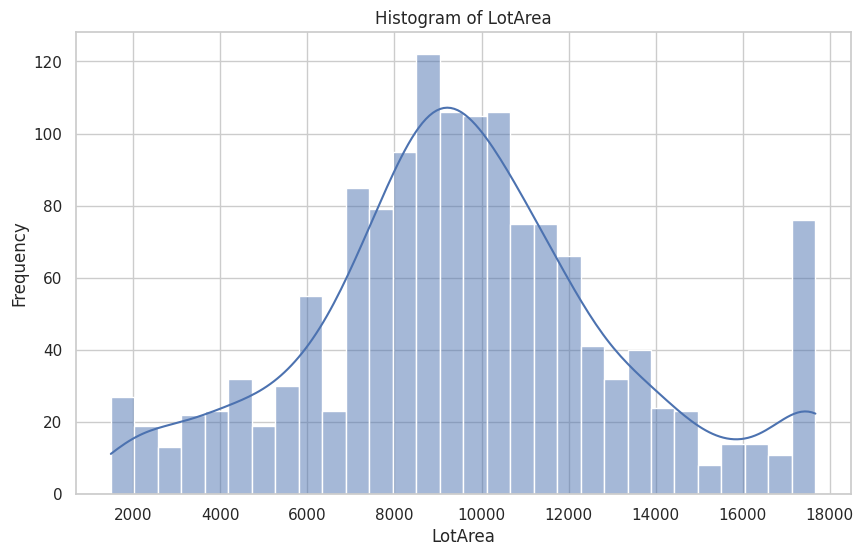

Histogram of LotArea displayed.


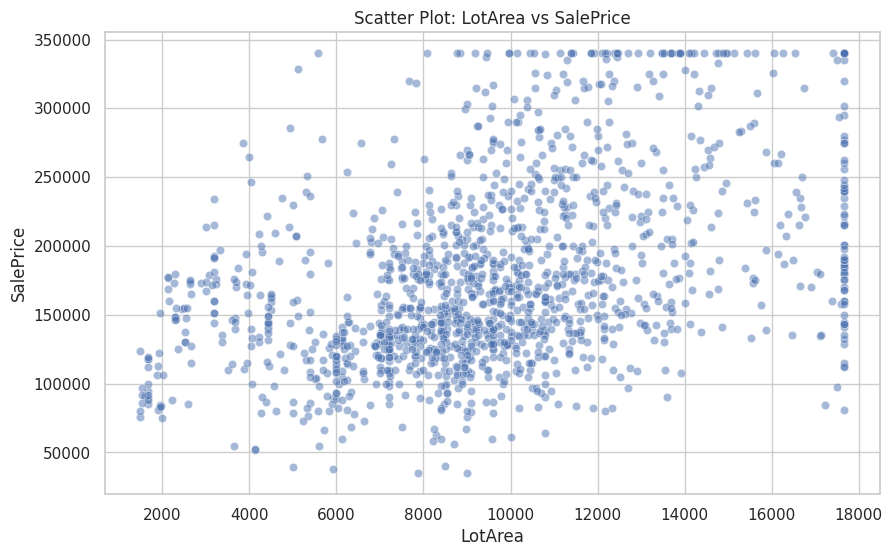

Scatter plot between LotArea and SalePrice displayed.


In [21]:
df = pd.read_csv("/content/drive/MyDrive/train_processed.csv")

# Example Queries
print(answer_question("Show me a histogram of LotArea", df))
print(answer_question("I want a scatter plot of LotArea vs SalePrice", df))